In [1]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
plt.style.use('default')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

In [2]:
def getData(num_samples):
    save_folder = 'train_0.5_valid_0.7_test'
    train_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_NaNmean.csv')
    X_train = train_data.drop(['Species'], axis = 1).values
    y_train = train_data[['Species']].copy().values
    valid_data = pd.read_csv('../data/' + save_folder + '/valid_data_NaNmean.csv')
    X_valid = valid_data.drop(['Species'], axis = 1).values
    y_valid = valid_data[['Species']].copy().values

    y_train = np.squeeze(y_train)
    n_values = np.max(y_train) + 1
    y_train = np.eye(n_values)[y_train]

    y_valid = np.squeeze(y_valid)
    n_values = np.max(y_valid) + 1
    y_valid = np.eye(n_values)[y_valid]
    return X_train, y_train, X_valid, y_valid

def getDataNormalization(num_samples):
    save_folder = 'train_0.5_valid_0.7_test'
    train_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_Normalization.csv')
    #X_train = train_data.drop(['Species', 'Culmen Length (mm)'], axis = 1).values
    X_train = train_data.drop(['Species'], axis = 1).values
    y_train = train_data[['Species']].copy().values
    valid_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_valid.csv')
    #X_valid = valid_data.drop(['Species', 'Culmen Length (mm)'], axis = 1).values
    X_valid = valid_data.drop(['Species'], axis = 1).values
    y_valid = valid_data[['Species']].copy().values
    
    # label should be int
    y_train = np.floor(y_train + 1.1).astype(int)
    y_train = np.squeeze(y_train)
    n_values = np.max(y_train) + 1
    y_train = np.eye(n_values)[y_train]
    
    # label should be int
    y_valid = np.floor(y_valid + 1.1).astype(int)
    y_valid = np.squeeze(y_valid)
    n_values = np.max(y_valid) + 1
    y_valid = np.eye(n_values)[y_valid]
    return X_train, y_train, X_valid, y_valid

def getTestDataset(num_samples):
    save_folder = 'train_0.5_valid_0.7_test'
    test_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_test.csv')
    #X_valid = valid_data.drop(['Species', 'Culmen Length (mm)'], axis = 1).values
    X_test = test_data.drop(['Species'], axis = 1).values
    y_test = test_data[['Species']].copy().values
    
    y_test = np.floor(y_test + 1.1).astype(int)
    y_test = np.squeeze(y_test)
    n_values = np.max(y_test) + 1
    y_test = np.eye(n_values)[y_test]
    return X_test, y_test

def getAccResult(history):
    history_dict = history.history
    val_acc_values = history_dict['val_accuracy']
    print(max(val_acc_values), val_acc_values.index(max(val_acc_values)))
    
def getHisAcc(history):
    history_dict = history.history
    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']
    return acc_values, val_acc_values

In [5]:
X_train, y_train, X_valid, y_valid = getDataNormalization(50)
tf.keras.backend.clear_session()
model = Sequential()

activation = 'relu'
model.add(Dense(16, input_shape=(7,), activation = activation, kernel_initializer=None, ))
model.add(BatchNormalization())
model.add(Dense(16, activation = activation))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax', name='output'))

optimizer = Adam(learning_rate=0.01)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

history = model.fit(X_train,
    y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_valid, y_valid))

c:\Users\DUYEN\anaconda3\envs\ml\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 579 (2.26 KB)

 Trainable params: 515 (2.01 KB)

 Non-trainable params: 64 (256.00 B)

None
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.2818 - loss: 1.5514 - val_accuracy: 0.5735 - val_loss: 1.0156
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8711 - loss: 0.4831 - val_accuracy: 0.8971 - val_loss: 0.8704
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9736 - loss: 0.2948 - val_accuracy: 0.9265 - val_loss: 0.7682
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.1483 - val_accuracy: 0.9412 - val_loss: 0.6921
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.1002 - val_accuracy: 0.9559 - val_loss: 0.6161
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.0795 - val_accuracy: 0.9559 - val_loss: 0.5447
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9840 - loss: 0.1001 - val_accuracy: 0.9853 - val_loss: 0.4871
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9920 - loss: 0.0771 - val_accuracy: 0.9559 - val_

In [6]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((50, 7), (50, 3), (68, 7), (68, 3))

In [7]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((50, 7), (50, 3), (68, 7), (68, 3))

In [8]:
X_train

array([[-1.02825835e+00,  7.87656633e-01, -1.52193979e+00,
        -8.16359657e-01, -1.85730227e-01,  7.51552011e-01,
        -8.55337202e-01],
       [-4.45825709e-01,  1.44912538e+00,  1.30780473e-01,
         6.05319313e-01,  4.47152568e-01, -8.94506427e-01,
        -8.55337202e-01],
       [ 1.01908062e+00,  1.39824317e+00,  1.30780473e-01,
        -2.47688069e-01,  2.04226885e+00,  1.33746857e+00,
        -8.55337202e-01],
       [-8.51763608e-01,  9.40303268e-01, -4.44078748e-01,
        -1.00591685e+00,  7.64412160e-01,  7.47789806e-01,
         7.89542033e-01],
       [-5.87021500e-01,  1.50000759e+00, -8.47917350e-02,
        -3.42466667e-01,  3.54769280e-01, -8.25961802e-01,
        -8.55337202e-01],
       [ 1.21322483e+00, -9.42338556e-01,  1.63978593e+00,
         1.64788389e+00, -3.34368955e-02, -1.41647800e+00,
        -8.55337202e-01],
       [-1.98733076e-01,  7.53056729e-02, -1.45008238e+00,
        -8.16359657e-01,  1.06641696e+00,  1.22151516e+00,
         7.8954203

In [9]:
def runANN(activation, epochs, lr, X_train, y_train, X_valid, y_valid, norm = False):
    tf.keras.backend.clear_session() # get rid of the affection of previous model
    model = Sequential()
    model.add(Dense(16, input_shape=(7,), activation = activation))
    if norm:
        model.add(BatchNormalization())
    model.add(Dense(16, activation = activation))
    if norm:
        model.add(BatchNormalization())
    model.add(Dense(3, activation='softmax', name='output'))

    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    #print(model.summary())

    history = model.fit(X_train,
        y_train,
        epochs=epochs,
        batch_size=16,
        validation_data=(X_valid, y_valid))
    
    return history

In [10]:
X_train, y_train, X_valid, y_valid = getData(50)
his_1 = runANN('relu', 1000, 0.1, X_train, y_train, X_valid, y_valid)
his_01 = runANN('relu', 1000, 0.01, X_train, y_train, X_valid, y_valid)
his_001 = runANN('relu', 1000, 0.001, X_train, y_train, X_valid, y_valid)

Epoch 1/1000


c:\Users\DUYEN\anaconda3\envs\ml\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.4207 - loss: 248.8674 - val_accuracy: 0.4412 - val_loss: 106.3591
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3467 - loss: 79.0074 - val_accuracy: 0.3676 - val_loss: 5.5653
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3339 - loss: 3.5897 - val_accuracy: 0.1912 - val_loss: 3.5823
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2783 - loss: 2.3240 - val_accuracy: 0.3676 - val_loss: 1.0856
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3996 - loss: 1.0914 - val_accuracy: 0.3676 - val_loss: 1.0634
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3464 - loss: 1.0679 - val_accuracy: 0.4412 - val_loss: 1.0520
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4010 - loss: 1.0726 - val_accuracy: 0.4412 - val_loss: 1.0475
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5073 - loss: 1.0240 - val_accuracy: 0.4412 - val_loss:

In [11]:
X_train, y_train, X_valid, y_valid = getDataNormalization(50)
his_1_norm = runANN('relu', 1000, 0.1, X_train, y_train, X_valid, y_valid, True)
his_01_norm = runANN('relu', 1000, 0.01, X_train, y_train, X_valid, y_valid, True)
his_001_norm = runANN('relu', 1000, 0.001, X_train, y_train, X_valid, y_valid, True)

Epoch 1/1000


c:\Users\DUYEN\anaconda3\envs\ml\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.5213 - loss: 0.8929 - val_accuracy: 0.9706 - val_loss: 0.0935
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9798 - loss: 0.0933 - val_accuracy: 0.9853 - val_loss: 0.0546
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8145 - loss: 0.5014 - val_accuracy: 0.9412 - val_loss: 0.1583
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9121 - loss: 0.1391 - val_accuracy: 0.9559 - val_loss: 0.1583
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.0193 - val_accuracy: 0.9853 - val_loss: 0.0228
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.0213 - val_accuracy: 1.0000 - val_loss: 6.3055e-04
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.0159 - val_accuracy: 1.0000 - val_loss: 8.1552e-05
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9489 - loss: 0.0703 - val_accuracy: 1.0000 - val_lo

C:\Users\DUYEN\AppData\Local\Temp\ipykernel_17952\2256339423.py:12: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1.1)
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' 

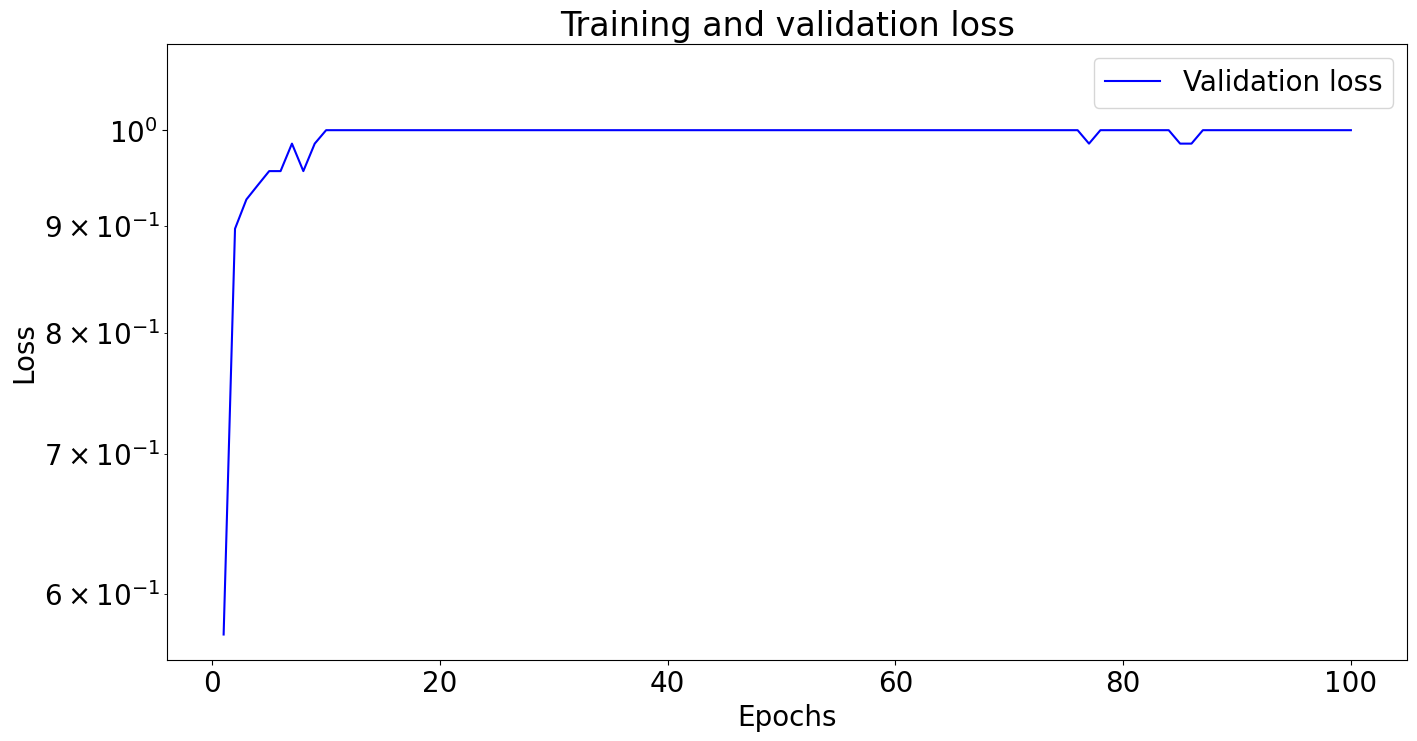

In [35]:
plt.rcParams['figure.figsize'] = [16, 8]
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_acc_values) + 1)
#plt.plot(epochs, acc_values[::1], 'bo', label='Training loss')
plt.plot(epochs, val_acc_values[::1], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.ylim(0, 1.1)
#plt.xlim(0, 2000)
plt.legend()
plt.show()

In [14]:
def getAccResult(history):
    history_dict = history.history
    val_acc_values = history_dict['val_accuracy']
    print(max(val_acc_values), val_acc_values.index(max(val_acc_values)))

In [15]:
getAccResult(his_1)
getAccResult(his_01)
getAccResult(his_001)
getAccResult(his_1_norm)
getAccResult(his_01_norm)
getAccResult(his_001_norm)

0.44117647409439087 0
0.9264705777168274 283
0.8823529481887817 821
1.0 5
1.0 59
1.0 299


In [16]:
def getHisAcc(history):
    history_dict = history.history
    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']
    return acc_values, val_acc_values

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

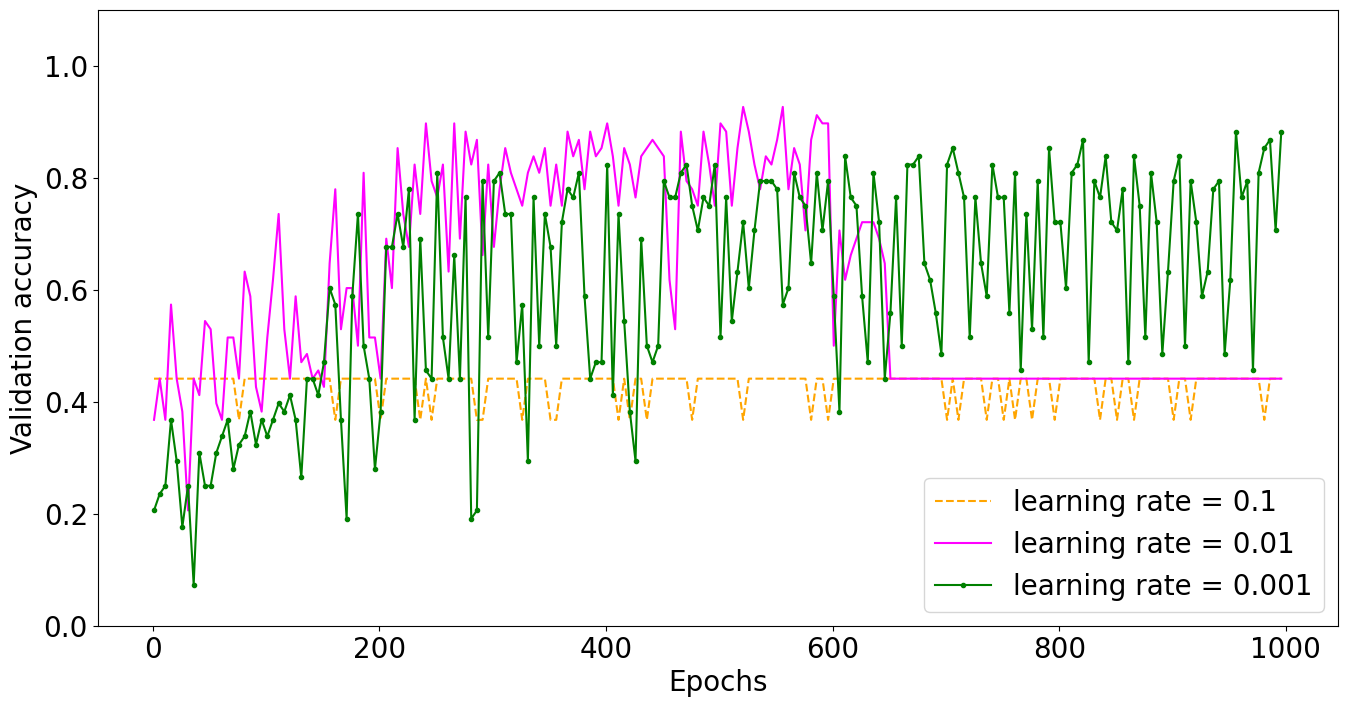

In [17]:
plt.rcParams['figure.figsize'] = [16, 8]
acc_values, val_acc_values = getHisAcc(his_1)
epochs = range(1, 1001, 5)
#plt.plot(epochs, acc_values[::1], 'bo', label='Training loss')
plt.plot(epochs, val_acc_values[::5], 'orange', label='learning rate = 0.1', linestyle='dashed')
acc_values, val_acc_values = getHisAcc(his_01)
plt.plot(epochs, val_acc_values[::5], 'magenta', label='learning rate = 0.01')
acc_values, val_acc_values = getHisAcc(his_001)
plt.plot(epochs, val_acc_values[::5], 'g', label='learning rate = 0.001', marker='.')
plt.xlabel('Epochs')
plt.ylabel('Validation accuracy')
#plt.yscale('log')
plt.ylim(0, 1.1)
#plt.xlim(0, 2000)
plt.legend()
plt.savefig('../pics/ANN/learning_rate_diff.svg', bbox_inches='tight')
plt.savefig('../pics/ANN/learning_rate_diff.pdf', bbox_inches='tight')
plt.show()

In [18]:
X_train, y_train, X_valid, y_valid = getDataNormalization(50)
his_50_sigmoid = runANN('sigmoid', 100, 0.01, X_train, y_train, X_valid, y_valid, True)
his_50_tanh = runANN('tanh', 100, 0.01, X_train, y_train, X_valid, y_valid, True)
his_50_linear = runANN('relu', 100, 0.01, X_train, y_train, X_valid, y_valid, True)
X_train, y_train, X_valid, y_valid = getDataNormalization(110)
his_110_sigmoid = runANN('sigmoid', 100, 0.01, X_train, y_train, X_valid, y_valid, True)
his_110_tanh = runANN('tanh', 100, 0.01, X_train, y_train, X_valid, y_valid, True)
his_110_linear = runANN('relu', 100, 0.01, X_train, y_train, X_valid, y_valid, True)
X_train, y_train, X_valid, y_valid = getDataNormalization(170)
his_170_sigmoid = runANN('sigmoid', 100, 0.01, X_train, y_train, X_valid, y_valid, True)
his_170_tanh = runANN('tanh', 100, 0.01, X_train, y_train, X_valid, y_valid, True)
his_170_linear = runANN('relu', 100, 0.01, X_train, y_train, X_valid, y_valid, True)

Epoch 1/100


c:\Users\DUYEN\anaconda3\envs\ml\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.5313 - loss: 1.1459 - val_accuracy: 0.5735 - val_loss: 1.0587
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9489 - loss: 0.2537 - val_accuracy: 0.5882 - val_loss: 0.9990
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9798 - loss: 0.1315 - val_accuracy: 0.4559 - val_loss: 0.9632
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9798 - loss: 0.1513 - val_accuracy: 0.4559 - val_loss: 0.9456
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9507 - loss: 0.1692 - val_accuracy: 0.4559 - val_loss: 0.9317
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9489 - loss: 0.1487 - val_accuracy: 0.4559 - val_loss: 0.9218
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9878 - loss: 0.0731 - val_accuracy: 0.4412 - val_loss: 0.9185
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9920 - loss: 0.0854 - val_accuracy: 0.4412 - val_loss: 0.9069
Epoc

c:\Users\DUYEN\anaconda3\envs\ml\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7594 - loss: 0.5529 - val_accuracy: 0.5588 - val_loss: 1.0280
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9903 - loss: 0.1269 - val_accuracy: 0.6471 - val_loss: 0.9250
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9929 - loss: 0.0464 - val_accuracy: 0.9706 - val_loss: 0.8272
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9832 - loss: 0.0551 - val_accuracy: 1.0000 - val_loss: 0.7597
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0213 - val_accuracy: 1.0000 - val_loss: 0.7070
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9977 - loss: 0.0236 - val_accuracy: 1.0000 - val_loss: 0.6431
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9677 - loss: 0.1165 - val_accuracy: 0.9706 - val_loss: 0.6065
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0092 - val_accuracy: 0.9706 - val_loss: 0.5794
Epoc

c:\Users\DUYEN\anaconda3\envs\ml\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7228 - loss: 0.5416 - val_accuracy: 0.4412 - val_loss: 0.9091
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9860 - loss: 0.0895 - val_accuracy: 0.7794 - val_loss: 0.8044
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9990 - loss: 0.0461 - val_accuracy: 0.7941 - val_loss: 0.7190
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9953 - loss: 0.0323 - val_accuracy: 0.8088 - val_loss: 0.6560
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9965 - loss: 0.0331 - val_accuracy: 0.8088 - val_loss: 0.6103
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9916 - loss: 0.0461 - val_accuracy: 0.8088 - val_loss: 0.5467
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9915 - loss: 0.0390 - val_accuracy: 0.8235 - val_loss: 0.4938
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9916 - loss: 0.0261 - val_accuracy: 0.8529 - val_loss: 0

In [19]:
getAccResult(his_50_sigmoid)
getAccResult(his_50_tanh)
getAccResult(his_50_linear)
getAccResult(his_110_sigmoid)
getAccResult(his_110_tanh)
getAccResult(his_110_linear)
getAccResult(his_170_sigmoid)
getAccResult(his_170_tanh)
getAccResult(his_170_linear)

1.0 35
1.0 35
1.0 48
1.0 3
1.0 11
1.0 13
1.0 22
1.0 5
1.0 14


In [20]:
X_train, y_train, X_valid, y_valid = getData(50)
his_50_sigmoid = runANN('sigmoid', 300, 0.01, X_train, y_train, X_valid, y_valid)
his_50_tanh = runANN('tanh', 300, 0.01, X_train, y_train, X_valid, y_valid)
his_50_linear = runANN('relu', 300, 0.01, X_train, y_train, X_valid, y_valid)
X_train, y_train, X_valid, y_valid = getData(110)
his_110_sigmoid = runANN('sigmoid', 300, 0.01, X_train, y_train, X_valid, y_valid)
his_110_tanh = runANN('tanh', 300, 0.01, X_train, y_train, X_valid, y_valid)
his_110_linear = runANN('relu', 300, 0.01, X_train, y_train, X_valid, y_valid)
X_train, y_train, X_valid, y_valid = getData(170)
his_170_sigmoid = runANN('sigmoid', 300, 0.01, X_train, y_train, X_valid, y_valid)
his_170_tanh = runANN('tanh', 300, 0.01, X_train, y_train, X_valid, y_valid)
his_170_linear = runANN('relu', 300, 0.01, X_train, y_train, X_valid, y_valid)

Epoch 1/300


c:\Users\DUYEN\anaconda3\envs\ml\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.4739 - loss: 1.1866 - val_accuracy: 0.4412 - val_loss: 1.1000
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4281 - loss: 1.0830 - val_accuracy: 0.4412 - val_loss: 1.0468
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3864 - loss: 1.0799 - val_accuracy: 0.4412 - val_loss: 1.0490
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3193 - loss: 1.1236 - val_accuracy: 0.4412 - val_loss: 1.0471
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4697 - loss: 1.0492 - val_accuracy: 0.4412 - val_loss: 1.0462
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4635 - loss: 1.0585 - val_accuracy: 0.4412 - val_loss: 1.0497
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4448 - loss: 1.0499 - val_accuracy: 0.4412 - val_loss: 1.0506
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4322 - loss: 1.0694 - val_accuracy: 0.4412 - val_loss: 1.0518
Epoc

c:\Users\DUYEN\anaconda3\envs\ml\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.3559 - loss: 1.0804 - val_accuracy: 0.4412 - val_loss: 1.0467
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4588 - loss: 1.0444 - val_accuracy: 0.4412 - val_loss: 1.0598
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4521 - loss: 1.0572 - val_accuracy: 0.4412 - val_loss: 1.0505
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4022 - loss: 1.0695 - val_accuracy: 0.4412 - val_loss: 1.0480
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3465 - loss: 1.0823 - val_accuracy: 0.4412 - val_loss: 1.0464
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3950 - loss: 1.0826 - val_accuracy: 0.4412 - val_loss: 1.0486
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4092 - loss: 1.0593 - val_accuracy: 0.4412 - val_loss: 1.0459
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4260 - loss: 1.0477 - val_accuracy: 0.4412 - val_loss: 1.0458
Epoc

c:\Users\DUYEN\anaconda3\envs\ml\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.3544 - loss: 1.1058 - val_accuracy: 0.4412 - val_loss: 1.0501
Epoch 2/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4604 - loss: 1.0549 - val_accuracy: 0.4412 - val_loss: 1.0461
Epoch 3/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4542 - loss: 1.0483 - val_accuracy: 0.4412 - val_loss: 1.0467
Epoch 4/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4631 - loss: 1.0481 - val_accuracy: 0.4412 - val_loss: 1.0455
Epoch 5/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4240 - loss: 1.0666 - val_accuracy: 0.4412 - val_loss: 1.0467
Epoch 6/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4135 - loss: 1.0644 - val_accuracy: 0.4412 - val_loss: 1.0455
Epoch 7/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4624 - loss: 1.0640 - val_accuracy: 0.4412 - val_loss: 1.0485
Epoch 8/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4371 - loss: 1.0633 - val_accuracy: 0.4412 - val_l

In [21]:
getAccResult(his_50_sigmoid)
getAccResult(his_50_tanh)
getAccResult(his_50_linear)
getAccResult(his_110_sigmoid)
getAccResult(his_110_tanh)
getAccResult(his_110_linear)
getAccResult(his_170_sigmoid)
getAccResult(his_170_tanh)
getAccResult(his_170_linear)

0.44117647409439087 0
0.44117647409439087 0
0.8529411554336548 207
0.44117647409439087 0
0.44117647409439087 1
0.9264705777168274 116
0.44117647409439087 0
0.44117647409439087 1
0.9558823704719543 239


In [22]:
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [23]:
X_train.shape

(170, 7)

In [26]:
results = model.evaluate(X_test, y_test)
results

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9909 - loss: 0.0288


[0.030857879668474197, 0.9903846383094788]

In [27]:
import pandas as pd
save_folder = 'train_0.5_valid_0.7_test'
pd.read_csv('../data/data_remove_outliers.csv').sample(frac=1).groupby(['Culmen Length (mm)','Culmen Depth (mm)', 'Flipper Length (mm)']).size().reset_index(name='Count').nunique()

Culmen Length (mm)     164
Culmen Depth (mm)       80
Flipper Length (mm)     55
Count                    1
dtype: int64

In [28]:
a = pd.read_csv('../data/train_0.5_valid_0.7_test/train_data.csv')
b = pd.read_csv('../data/train_0.5_valid_0.7_test/valid_data.csv')
c = pd.read_csv('../data/train_0.5_valid_0.7_test/test_data.csv')
frames = [a, b, c]
df = pd.concat(frames).sample(frac=1)
df.groupby(['Culmen Length (mm)','Culmen Depth (mm)', 'Flipper Length (mm)']).size().reset_index(name='Count').nunique()

Culmen Length (mm)     164
Culmen Depth (mm)       80
Flipper Length (mm)     55
Count                    1
dtype: int64

In [29]:
pd.read_csv('../data/' + save_folder + '/train_data_' + str(50) + '_valid.csv')

Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \
0             0.454297          -2.010865             0.705640       0.320984   
1            -0.481125           0.889421             0.490067       0.068241   
2            -0.869413          -0.077341            -0.947081      -1.700960   
3             2.554585           0.329717            -1.450082      -0.689988   
4             1.513266          -0.077341             2.070930       1.647884   
..                 ...                ...                  ...            ...   
63            0.083659          -1.807336             0.490067       0.131426   
64           -1.098856           0.329717            -0.731508      -1.132288   
65            0.895534          -0.586163             2.070930       1.963813   
66           -1.116506           1.143832            -1.234510      -0.437245   
67            0.489596          -0.687927             0.993069       1.016027   

    Delta 15 N (o/oo)  Delta 13 C (o/oo)       Sex  Species  
0           -1.403404           0.189096  0.789542      1.0  
1           -0.514226          -1.142687 -0.855337     -1.0  
2            0.755194          -0.134304  0.789542     -1.0  
3            0.689029           1.356455  0.789542      0.0  
4           -0.888941          -0.564182 -0.855337      1.0  
..                ...                ...       ...      ...  
63          -1.354694          -1.272302  0.789542      1.0  
64          -0.795794          -0.898394  0.789542     -1.0  
65          -0.306296          -1.308399 -0.855337      1.0  
66          -0.744485          -0.978275 -0.855337     -1.0  
67          -1.554843           0.354496 -0.855337      1.0  

[68 rows x 8 columns]

array([[<Axes: xlabel='a', ylabel='a'>, <Axes: xlabel='b', ylabel='a'>,
        <Axes: xlabel='c', ylabel='a'>, <Axes: xlabel='d', ylabel='a'>],
       [<Axes: xlabel='a', ylabel='b'>, <Axes: xlabel='b', ylabel='b'>,
        <Axes: xlabel='c', ylabel='b'>, <Axes: xlabel='d', ylabel='b'>],
       [<Axes: xlabel='a', ylabel='c'>, <Axes: xlabel='b', ylabel='c'>,
        <Axes: xlabel='c', ylabel='c'>, <Axes: xlabel='d', ylabel='c'>],
       [<Axes: xlabel='a', ylabel='d'>, <Axes: xlabel='b', ylabel='d'>,
        <Axes: xlabel='c', ylabel='d'>, <Axes: xlabel='d', ylabel='d'>]],
      dtype=object)

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

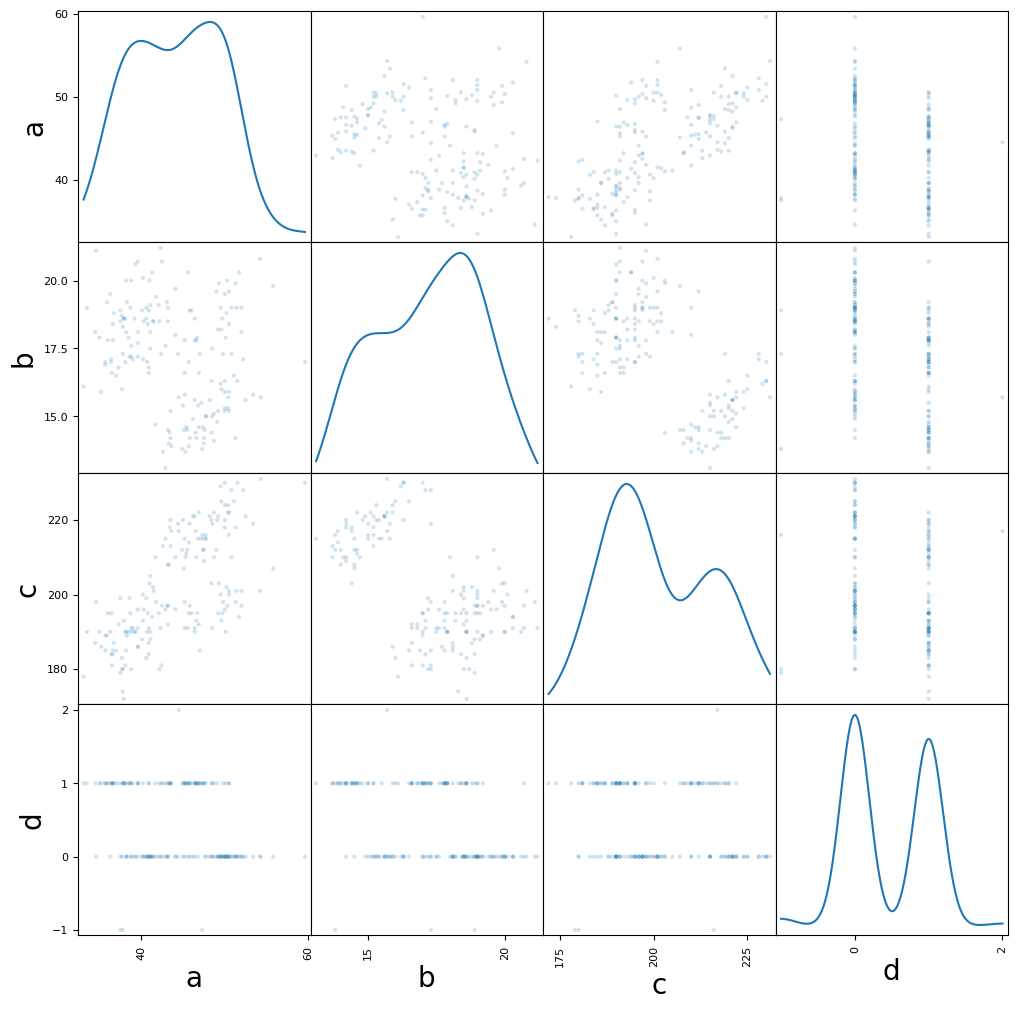

In [30]:
a = pd.read_csv('../data/train_0.5_valid_0.7_test/train_data.csv')
a = a.drop(['Species', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Body Mass (g)'], axis = 1).values
from pandas.plotting import scatter_matrix
df = pd.DataFrame(a, columns = ['a', 'b', 'c', 'd'])
scatter_matrix(df, alpha = 0.2, figsize = (12, 12), diagonal = 'kde')

In [ ]:
# a = a.drop(['Species', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Body Mass (g)'], axis = 1).values

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

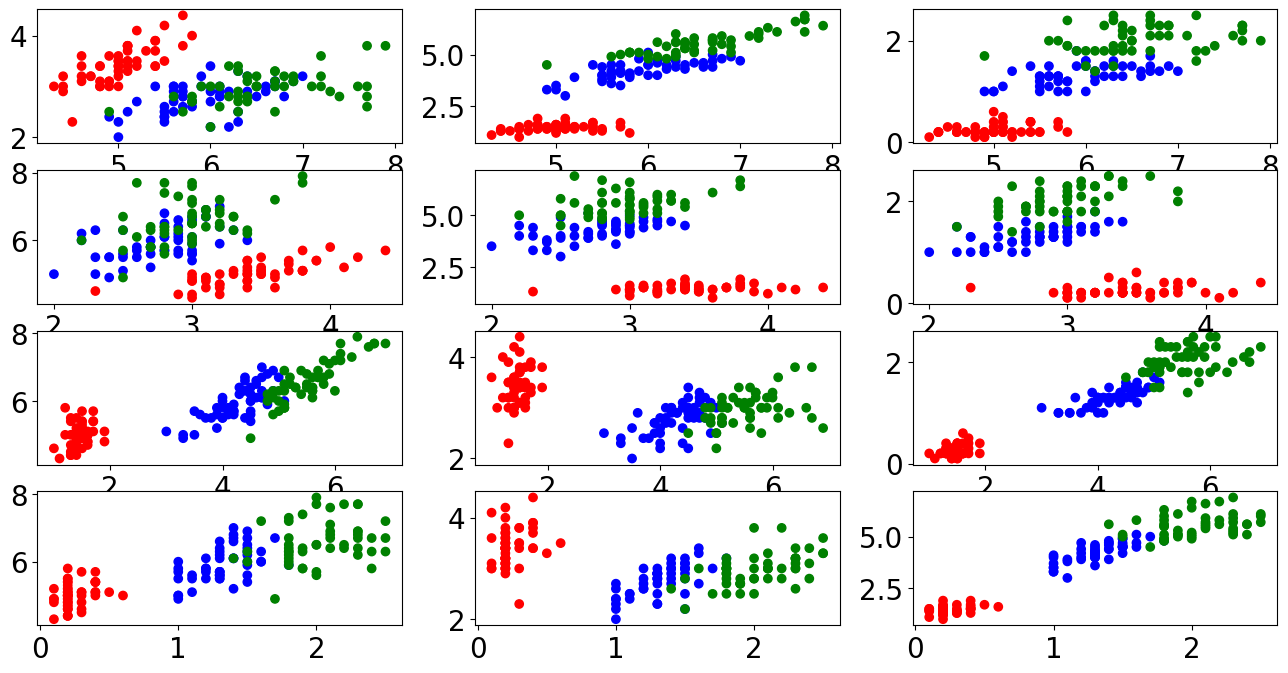

In [36]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np

 #setting the shape of the figure in one line as opposed to creating 12 variables
fig, subs = plt.subplots(4,3) 

#code given in Hyperion notes
iris = load_iris()
data = np.array(iris['data'])
targets = np.array(iris['target'])

cd = {0:'r',1:'b',2:"g"}
cols = np.array([cd[target] for target in targets])
#ROW 1
subs[0][0].scatter(data[:,0], data[:,1], c=cols)
subs[0][1].scatter(data[:,0], data[:,2], c=cols)
subs[0][2].scatter(data[:,0], data[:,3], c=cols)
#ROW 2
subs[1][0].scatter(data[:,1], data[:,0], c=cols)
subs[1][1].scatter(data[:,1], data[:,2], c=cols)
subs[1][2].scatter(data[:,1], data[:,3], c=cols)
#ROW 3
subs[2][0].scatter(data[:,2], data[:,0], c=cols)
subs[2][1].scatter(data[:,2], data[:,1], c=cols)
subs[2][2].scatter(data[:,2], data[:,3], c=cols)
#ROW 4
subs[3][0].scatter(data[:,3], data[:,0], c=cols)
subs[3][1].scatter(data[:,3], data[:,1], c=cols)
subs[3][2].scatter(data[:,3], data[:,2], c=cols)
#show data plot
plt.show()

In [37]:
import plotly.express as px
plt.rcParams['figure.figsize'] = [12, 24]
a = pd.read_csv('../data/train_0.5_valid_0.7_test/train_data.csv')
a = a.drop(['Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Body Mass (g)'], axis = 1)
fig = px.scatter_matrix(a,
    dimensions=["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Sex"],
    color="Species")
fig.show()

In [38]:
df

sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     species_id  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
145           3  
146           3  
147           3  
148           3  
149           3  

[150 rows x 6 columns]

In [39]:
a = pd.read_csv('../data/train_0.5_valid_0.7_test/train_data.csv')
a = a.drop(['Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Body Mass (g)'], axis = 1)
a

Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Sex  Species
0                  54.3               15.7                231.0    0        2
1                  43.2               19.0                197.0    0        0
2                  45.5               14.5                212.0    1        2
3                  51.4               19.0                201.0    0        1
4                  46.5               14.4                217.0    1        2
..                  ...                ...                  ...  ...      ...
165                46.6               17.8                193.0    1        1
166                51.1               16.5                225.0    0        2
167                52.0               18.1                201.0    0        1
168                38.8               17.2                180.0    0        0
169                36.0               17.8                195.0    1        0

[170 rows x 5 columns]

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

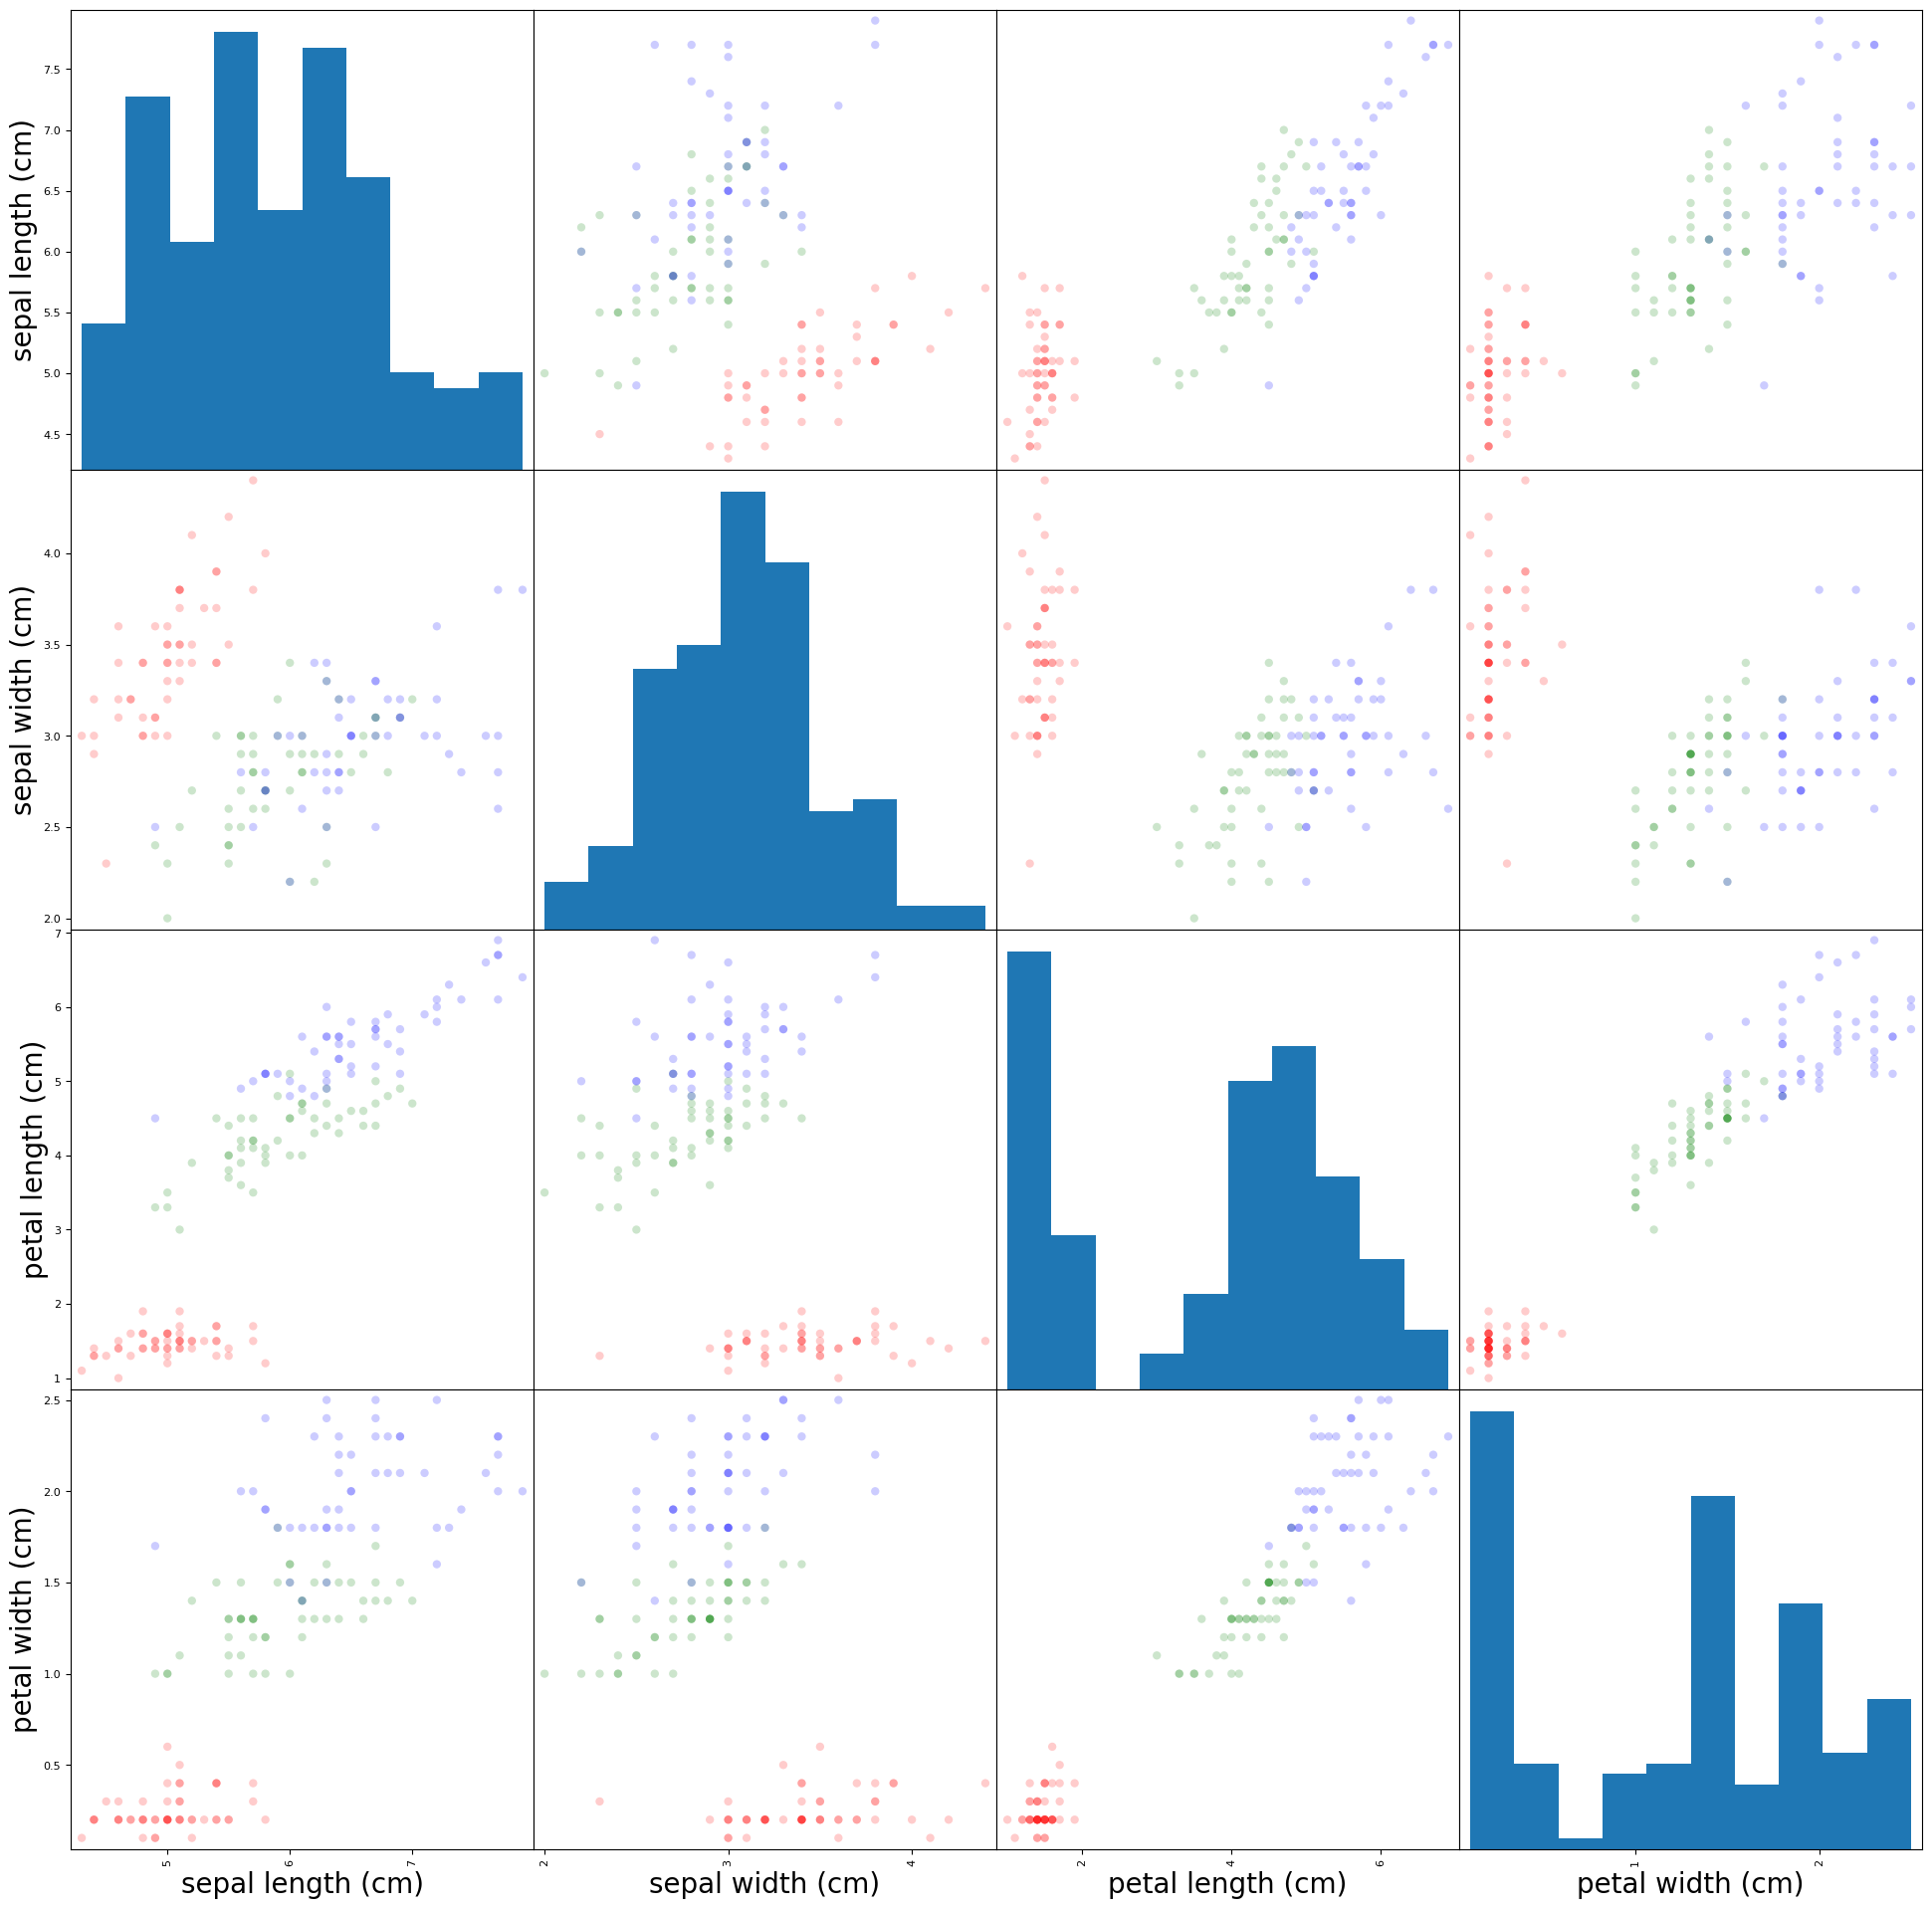

In [40]:
from sklearn.datasets import load_iris
from numpy import array
from pandas import DataFrame
from pandas.plotting import scatter_matrix

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

a = pd.read_csv('../data/data_remove_outliers.csv')
a = a.drop(['Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Body Mass (g)', 'Sex'], axis = 1)
iris = load_iris()
df = DataFrame(iris.data, columns=iris.feature_names)
colors=array(50*['r']+50*['g']+50*['b'])
scatter_matrix(df, alpha=0.2, figsize=(24,24), color=colors, marker = 'o')

array([[<Axes: xlabel='Culmen Length (mm)', ylabel='Culmen Length (mm)'>,
        <Axes: xlabel='Culmen Depth (mm)', ylabel='Culmen Length (mm)'>,
        <Axes: xlabel='Flipper Length (mm)', ylabel='Culmen Length (mm)'>,
        <Axes: xlabel='Body Mass (g)', ylabel='Culmen Length (mm)'>],
       [<Axes: xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>,
        <Axes: xlabel='Culmen Depth (mm)', ylabel='Culmen Depth (mm)'>,
        <Axes: xlabel='Flipper Length (mm)', ylabel='Culmen Depth (mm)'>,
        <Axes: xlabel='Body Mass (g)', ylabel='Culmen Depth (mm)'>],
       [<Axes: xlabel='Culmen Length (mm)', ylabel='Flipper Length (mm)'>,
        <Axes: xlabel='Culmen Depth (mm)', ylabel='Flipper Length (mm)'>,
        <Axes: xlabel='Flipper Length (mm)', ylabel='Flipper Length (mm)'>,
        <Axes: xlabel='Body Mass (g)', ylabel='Flipper Length (mm)'>],
       [<Axes: xlabel='Culmen Length (mm)', ylabel='Body Mass (g)'>,
        <Axes: xlabel='Culmen Depth (mm)', ylabel='Body

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

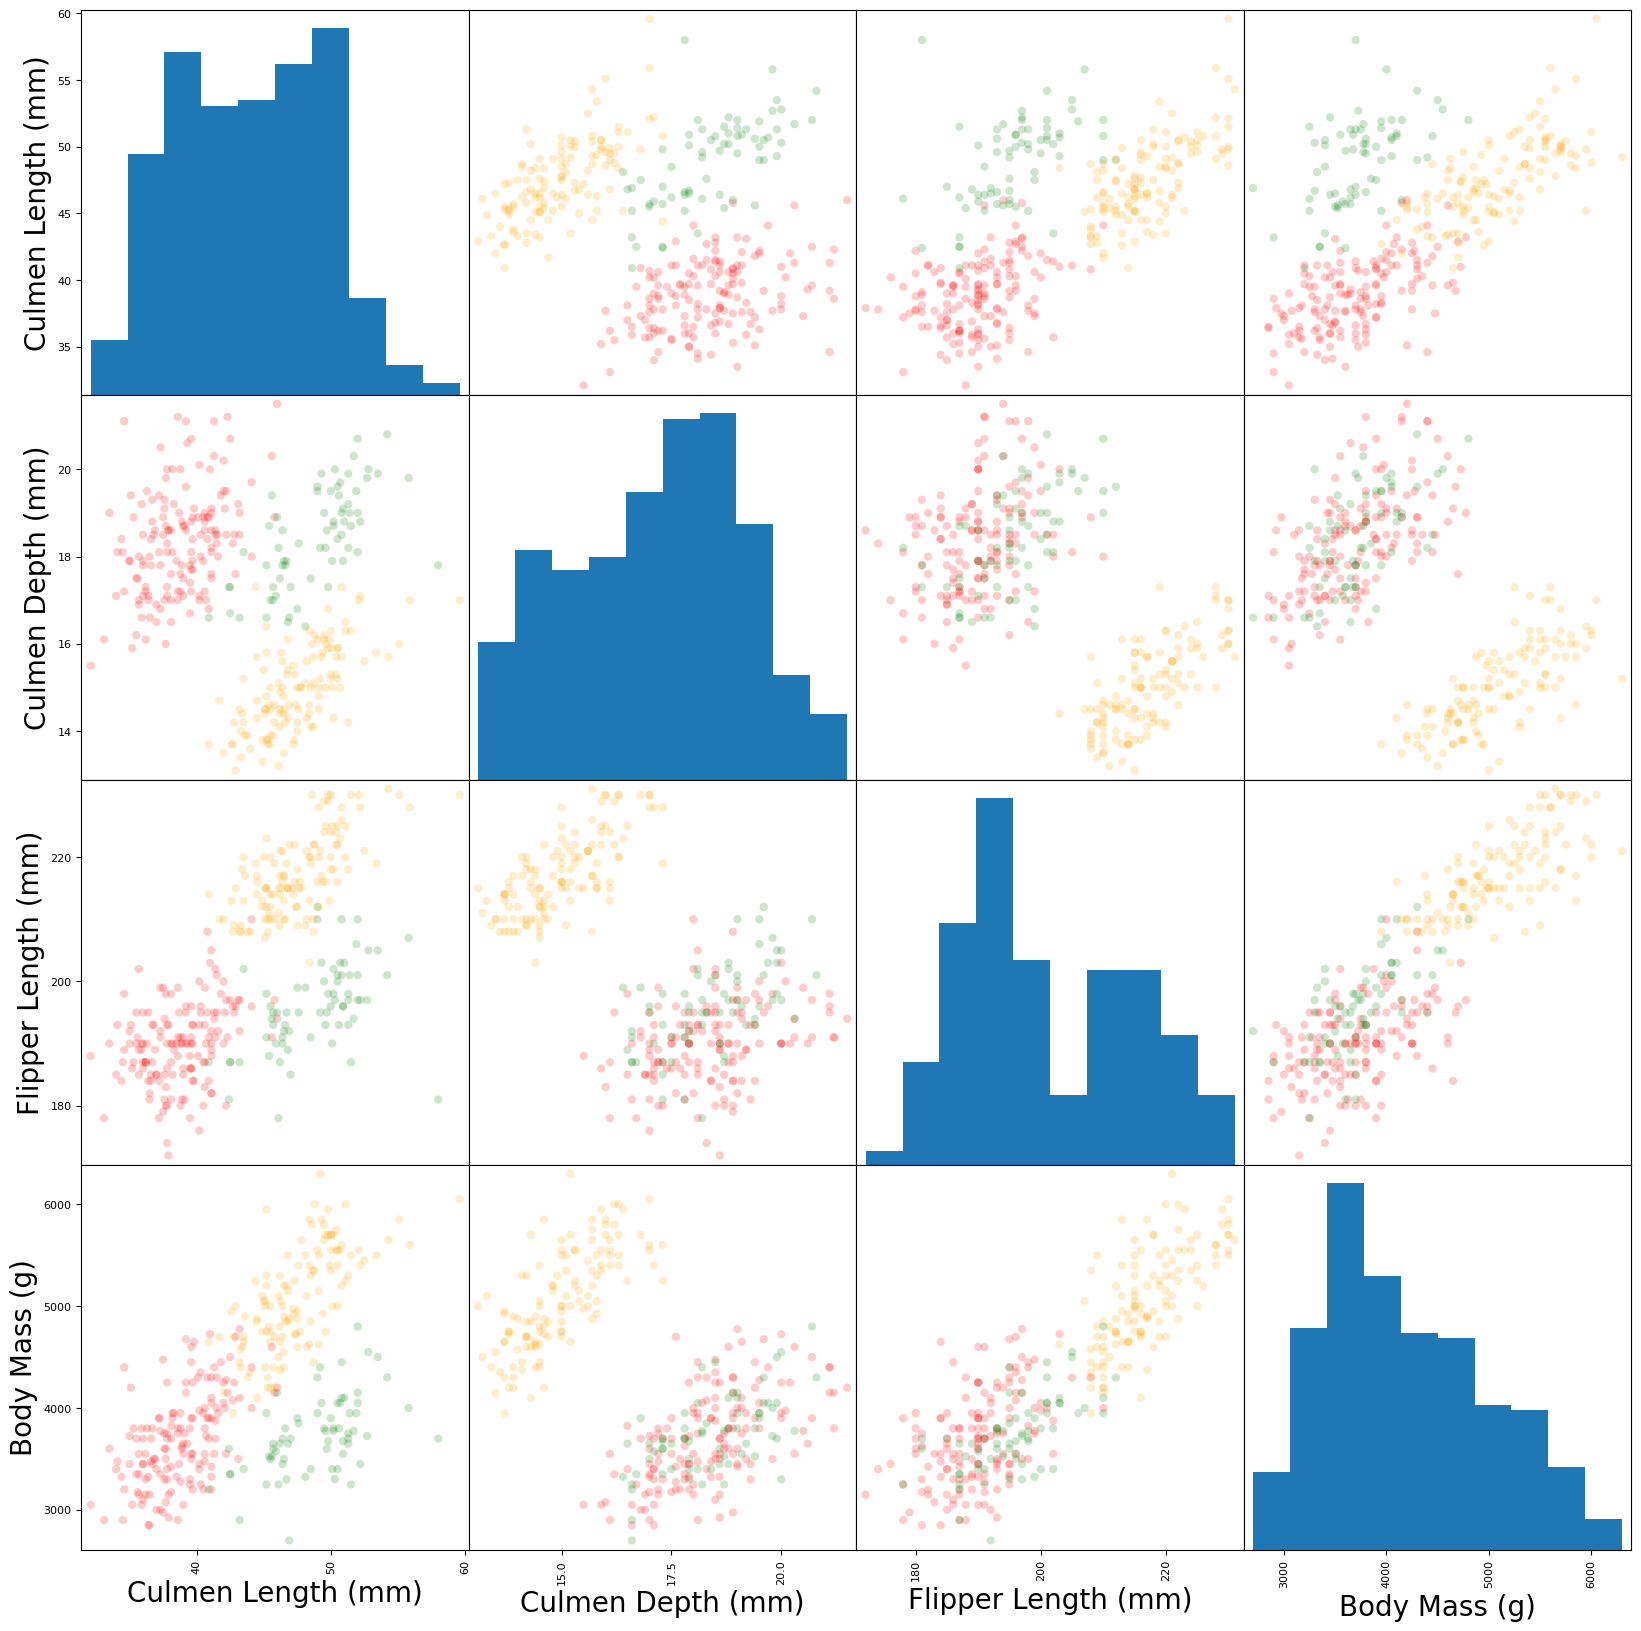

In [41]:
from sklearn.datasets import load_iris
from numpy import array
from pandas import DataFrame
from pandas.plotting import scatter_matrix

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

a = pd.read_csv('../data/data_remove_outliers.csv')
b = a[['Species']].copy().values
a = a.drop(['Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Species', 'Sex'], axis = 1).values
iris = load_iris()
df = DataFrame(a, columns=['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)'])
colors=array(151*['red']+68*['g']+123*['orange'])
scatter_matrix(df, alpha=0.2, figsize=(20,20), color = colors, marker = 'o')

In [42]:
pd.read_csv('../data/data_remove_outliers.csv').drop(['Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Species', 'Sex'], axis = 1)

Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)
0                  39.1               18.7                181.0         3750.0
1                  39.5               17.4                186.0         3800.0
2                  40.3               18.0                195.0         3250.0
3                  36.7               19.3                193.0         3450.0
4                  39.3               20.6                190.0         3650.0
..                  ...                ...                  ...            ...
337                47.2               13.7                214.0         4925.0
338                46.8               14.3                215.0         4850.0
339                50.4               15.7                222.0         5750.0
340                45.2               14.8                212.0         5200.0
341                49.9               16.1                213.0         5400.0

[342 rows x 4 columns]

In [43]:
np.count_nonzero(b == 'Adelie Penguin (Pygoscelis adeliae)'), np.count_nonzero(b == 'Chinstrap penguin (Pygoscelis antarctica)'), np.count_nonzero(b == 'Gentoo penguin (Pygoscelis papua)')

(151, 68, 123)

findfont: Font family 'normal' not found.


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

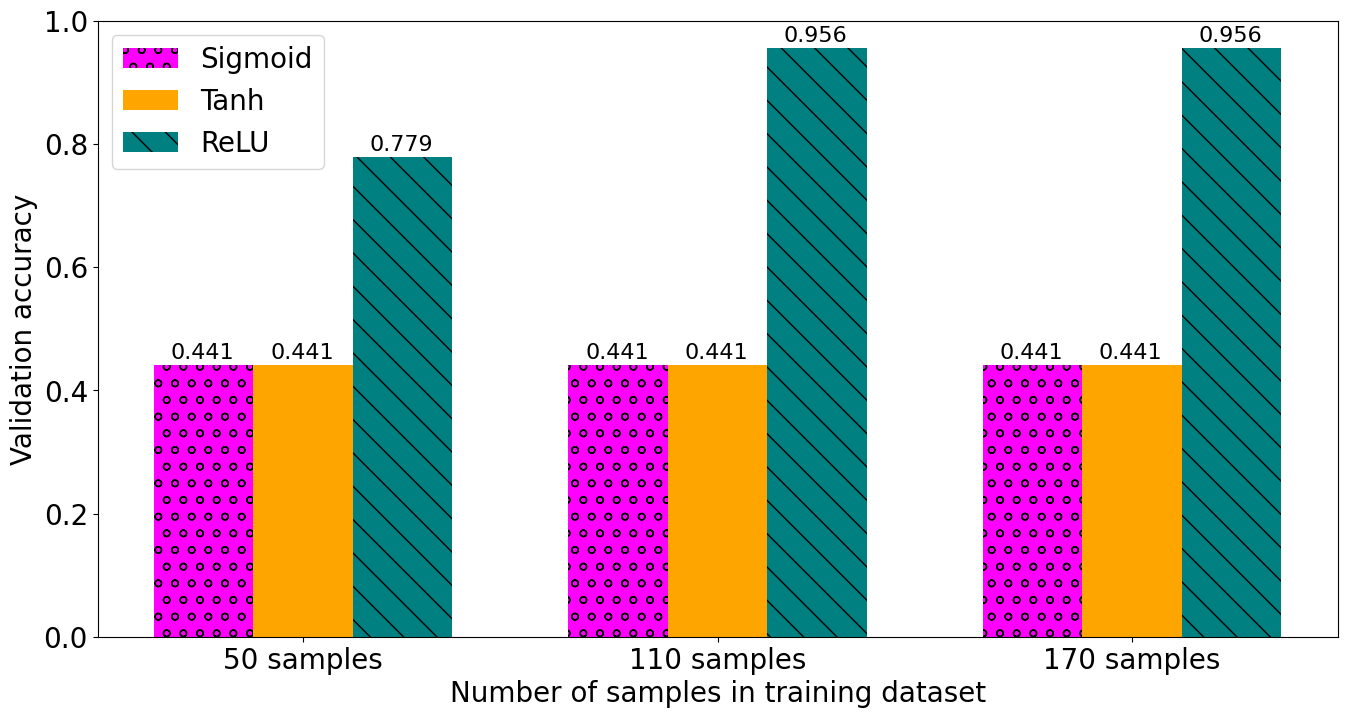

In [44]:
objects = ('50 samples', '110 samples', '170 samples')
y_pos = np.arange(len(objects))
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = '20'

sigmoids = [0.4411,0.4411,0.4411]
tanhs = [0.4411,0.4411,0.4411]
relus = [0.779,0.9558,0.9558]

for index, value in enumerate(sigmoids):
    plt.text(index - 0.32, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(tanhs):
    plt.text(index - 0.08, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(relus):
    plt.text(index + 0.16, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
# for index, value in enumerate(min_rewardVSs):
#     plt.text(index + 0.25, value + 0.1, str("{:.3f}".format(value)), fontsize=14)
#plt.bar(y_pos, performance, align='center', alpha=0.5)
bars_sigmoid = plt.bar(y_pos - 0.24, sigmoids, 0.24, label = 'Sigmoid', color = 'magenta')
plt.bar(y_pos, tanhs, 0.24, label = 'Tanh', color = 'orange')
bars_linear = plt.bar(y_pos + 0.24, relus, 0.24, label = 'ReLU', color = 'teal')
#plt.bar(y_pos + 0.36, min_rewardVSs, 0.24, label = 'Lowest tolerance latency in a time slot compared to 5 VS')
plt.xticks(y_pos, objects)
plt.ylim([0, 1])
patterns = ("o", "o", "o")
for i, x in zip(bars_sigmoid,patterns):
      i.set_hatch(x)
patterns = ("\\", "\\", "\\")
for i, x in zip(bars_linear,patterns):
      i.set_hatch(x)
plt.legend(fontsize = 20)
#plt.margins(0.1,0)
plt.ylabel('Validation accuracy')
plt.xlabel('Number of samples in training dataset')
plt.savefig('../pics/ANN/activation_with_different_data.svg', bbox_inches='tight')
plt.savefig('../pics/ANN/activation_with_different_data.pdf', bbox_inches='tight')
plt.show()

In [25]:
X_test, y_test = getTestDataset(50)

In [45]:
X_train, y_train, X_valid, y_valid = getDataNormalization(50)
X_test, y_test = getTestDataset(50)

In [46]:
def runANNTest(activation, epochs, lr, X_train, y_train, norm = False):
    tf.keras.backend.clear_session() # get rid of the affection of previous model
    model = Sequential()
    model.add(Dense(16, input_shape=(7,), activation = activation))
    if norm:
        model.add(BatchNormalization())
    model.add(Dense(16, activation = activation))
    if norm:
        model.add(BatchNormalization())
    model.add(Dense(3, activation='softmax', name='output'))

    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    #print(model.summary())
    
    model.fit(X_train, y_train, verbose=2, batch_size=16, epochs=epochs)
    
    return model

In [47]:
X_train, y_train, X_valid, y_valid = getDataNormalization(50)
X_test, y_test = getTestDataset(50)
model = runANNTest('tanh', 13, 0.01, X_train, y_train, True)
model.evaluate(X_test, y_test)

Epoch 1/13


c:\Users\DUYEN\anaconda3\envs\ml\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



4/4 - 1s - 313ms/step - accuracy: 0.4800 - loss: 1.1234
Epoch 2/13
4/4 - 0s - 17ms/step - accuracy: 0.8400 - loss: 0.4110
Epoch 3/13
4/4 - 0s - 14ms/step - accuracy: 0.9800 - loss: 0.2332
Epoch 4/13
4/4 - 0s - 11ms/step - accuracy: 0.9400 - loss: 0.2109
Epoch 5/13
4/4 - 0s - 12ms/step - accuracy: 0.9400 - loss: 0.2175
Epoch 6/13
4/4 - 0s - 13ms/step - accuracy: 0.9400 - loss: 0.2083
Epoch 7/13
4/4 - 0s - 13ms/step - accuracy: 0.9400 - loss: 0.1691
Epoch 8/13
4/4 - 0s - 13ms/step - accuracy: 0.9600 - loss: 0.1260
Epoch 9/13
4/4 - 0s - 13ms/step - accuracy: 0.9600 - loss: 0.1424
Epoch 10/13
4/4 - 0s - 14ms/step - accuracy: 0.9800 - loss: 0.0849
Epoch 11/13
4/4 - 0s - 15ms/step - accuracy: 0.9800 - loss: 0.1443
Epoch 12/13
4/4 - 0s - 16ms/step - accuracy: 0.9400 - loss: 0.1502
Epoch 13/13
4/4 - 0s - 16ms/step - accuracy: 1.0000 - loss: 0.0555
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9694 - loss: 0.1659 


[0.15351659059524536, 0.9807692170143127]

In [48]:
X_train, y_train, X_valid, y_valid = getDataNormalization(110)
X_test, y_test = getTestDataset(110)
model = runANNTest('tanh', 8, 0.01, X_train, y_train, True)
model.evaluate(X_test, y_test)

Epoch 1/8


c:\Users\DUYEN\anaconda3\envs\ml\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 - 1s - 158ms/step - accuracy: 0.8909 - loss: 0.4288
Epoch 2/8
7/7 - 0s - 10ms/step - accuracy: 0.9636 - loss: 0.1503
Epoch 3/8
7/7 - 0s - 9ms/step - accuracy: 0.9818 - loss: 0.0707
Epoch 4/8
7/7 - 0s - 11ms/step - accuracy: 0.9909 - loss: 0.0483
Epoch 5/8
7/7 - 0s - 8ms/step - accuracy: 0.9909 - loss: 0.0709
Epoch 6/8
7/7 - 0s - 8ms/step - accuracy: 0.9909 - loss: 0.0361
Epoch 7/8
7/7 - 0s - 8ms/step - accuracy: 0.9909 - loss: 0.0246
Epoch 8/8
7/7 - 0s - 11ms/step - accuracy: 0.9909 - loss: 0.0343
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9238 - loss: 0.1417  


[0.1160939559340477, 0.942307710647583]

In [49]:
X_train, y_train, X_valid, y_valid = getDataNormalization(170)
X_test, y_test = getTestDataset(170)
model = runANNTest('tanh', 3, 0.01, X_train, y_train, True)
model.evaluate(X_test, y_test)

Epoch 1/3


c:\Users\DUYEN\anaconda3\envs\ml\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



11/11 - 1s - 110ms/step - accuracy: 0.7882 - loss: 0.5931
Epoch 2/3
11/11 - 0s - 7ms/step - accuracy: 0.9588 - loss: 0.1531
Epoch 3/3
11/11 - 0s - 6ms/step - accuracy: 0.9824 - loss: 0.0659
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9541 - loss: 0.1069  


[0.09181429445743561, 0.9711538553237915]

In [12]:
1e-9 - 0.000000001

0.0